<p style='text-align: center;'> <font size='4;'> <b> Linking anthropogenic forcing history 1850-2014 with temperature evolution <b> </font> </p>  

<p style='text-align: center;'> <font size = '3;' > Stine Sagen </font> </p>

<p style='text-align: center;'> <font size = '3;' > University of Oslo </font> </p>

<p style='text-align: center;'> <font size = '3;' > stinsage@student.geo.uio.no </font> </p>

<p style='text-align: center;'> <font size = '3;' > NeGI course 2019 - eScience for linking Arctic measurements and modeling  </font> </p>

<p style='text-align: center;'> <font size = '3;' > Group assistants: Diego Aliaga and Michael Schulz </font> </p>

<p style='text-align: center;'> <font size = '3;' > November 12, 2019  </font> </p>

<center> <img src="http://newsroom.au.dk/typo3temp/_processed_/csm_Fabrik_med_roeg_ce45bc5d8f.jpg" alt="drawing" width="500"/>

## Abstract 

<p style='text-align: justify;'> This study analyzes anthropogenic forcing history with global yearly temperature evolution. A non-even temperature evolution is present from the temperature anomalies in both the observations and the climate models used(CanESM5, MIROC6, and IPSL-CM6A-LR). A warming can be observed from about 1900 to 1940, a slight cooling between 1940-1975 and warming from about 1975 towards recently. The minor cooling has an estimated value of -0.030 °C per decade, in which corresponding to approximately -0.1 °C over the years. The IPSL-CM6A-LR model does not capture the cooling signal. The Detection and Attribution Model Intercomparison Project (DAMIP) experiments contained in the CMIP6 make it possible to isolate the effect of individual forcing agents (here: anthropogenic aerosols and anthropogenic well-mixed greenhouse gases (WMGHGs)). Estimated forcing, computed as a change in the radiative balance at the top of the models relative to pre-industrial conditions, shows that anthropogenic WMGHGs is getting increased importance in explaining the observed global temperature increase. MIROC6 shows less differences in forcing and temperature response compared to CanESM.</p>  

##  1. Introduction 

Radiative forcing (RF) is referred to as the net change in the energy balance of the Earth system, owing to some applied external perturbation. It's measured in watts per square meter (W/m^2), often represented as changes relative to pre-industrial conditions. Such perturbations include, i.e., increase in the concentrations of anthropogenic aerosols, anthropogenic well-mixed greenhouse gases (WMGHGs), and natural contributions. The term anthropogenic forcing is used as one of two parts of the RF concept, which describe disturbances in the Earth's energy budget due to emissions induced from human activity. Anthropogenic WMGHGs are greenhouse gases with a rather long lifetime, which makes it relatively homogeneously mixed throughout the troposphere. The essential gases among these include $CO_2$, $CH_4$ and $N_2O$. These gases prevent much of the longwave radiation from escaping the Earth system, contributing to a  positive radiative forcing to the climate system. The other part of RF is the natural forcing, including, i.e., volcanic eruptions and changes in solar irradiance. In association with a volcanic eruption, i.e., sulfur dioxide particles are emitted into the troposhere. These are being transported into the stratosphere, where they combine with water to produce sulfuric acid aerosols and can effectively cool the Earth by reflecting incoming short wave radiation. 
    
Often, the concept of effective radiative forcing (ERF) is used instead of RF, which is more capable of accounting for rapid changes such as cloud-aerosol interactions (IPCC,2013). Typical values of ERF presented by the intergovernmental panel of climate change (IPCC) are: 0.291 W/m^2 (1950), 0.675 W/m^2 (1980) and 1.005 W/m^2 (2010) for the WMGHGs forcing, –0.394 W/m^2 (1950), –0.751  W/m^2 (1980) and -0.900 W/m^2 (2010) for the anthropogenic contribution from aerosols (IPCC, 2013: Annex II). The increases in WMGHGs have extensively strengthened the greenhouse effect, and aerosols are considered to have a large impact on the energy balance as the negative forcing might partly counteract the positive forcing from the WMGHGs (IPCC,2013). The anthropogenic aerosol injections enhance reflection and absorption of short wave radiation. This, in turn, reduces the amount of solar radiation reaching the surface of the Earth and is affecting the temperature near-surface (Ramanathan et al,2001). 

This report aims to investigate the link between the global anthropogenic forcing evolution and the global average surface temperature evolution over the same period. To be able to study the effect on temperature from one forcing agent alone, the Coupled Model Intercomparison Project Phase 6 (CMIP6) provides simulations with different components being isolated, and the impact on different variables could be addressed. We are expecting to see a temperature decrease for the aerosol forcing alone. On the other hand, the forcing induced by only WMGHGs, we will expect to see a temperature increase. These simulations, in addition to the data and the selected models used in this work, are explained in Section 2. First, the temperature anomalies evolution in observations, and for three climate models are studied. The observations and the historical model runs are compared with each other, among other things, through how well the models reproduce cooling signals after some chosen volcanic eruptions. Second, based on the perturbation experiments, the time evolution of aerosol forcing and WMGHGs forcing are compared for two of the models. In the end, the temperature response from anthropogenic aerosols and anthropogenic WMGHGs forcing are compared for the same models as in the second part. 

The report is structured as follows. Section 1 gives a motivation and presents the aim of the report. Section 2 explains the data and methods used, including packages/functions used and model/experiment info. Section 3 and 4 presents and discusses the results. Last, Section 5 yields conclusions and further outlook. 

## 2. Data and methods 

For this work, the programming language Python (version 3.7.3) is used. The corresponding packages needed are listed below: 

In [1]:
# Import packages 
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sys
import statsmodels.formula.api as smf 
%matplotlib inline

Large parts of the code are collected into several functions. These could be found in the separated python file called "functions_stine_new.py". The functions used are imported into this main Jupyter notebook as follows: 

In [2]:
from functions_stine_new import (trend_years, trend_years2,reg_obs, reg_model, calc_trend,calc_trend_model,calc_trend_model2,plot_line,pre_process_observations,global_climatology,
                             plot_line_models, global_anomalies,open_processed_model_tas_files,open_processed_model_radiation_files,
                            compute_net_rad,compute_forcing,bars)

For the results, only yearly global averages are considered. The steps in how the observations were processed can be seen in the function called "pre_process_observations".  For the model data, several challenges raised during the pre-processing. Among other things, the time format for some of the files (the PiControl files mostly) can't be used by python. For that purpose, Diego assisted with some useful functions to transform the data into Datetime64 format. When doing a global average of the values, it's necessary to account for decreasing grid boxes towards the poles by preforming a weighted average. The pre-processing of the model files can be seen in the functions called: "pre_process_historical", "pre_process_histaer",  "pre_process_histGHG" and "pre_process_ctrl". All the yearly global averaged pre-processed files are written into new NetCDF-files before re-opened. The reason behind this, is to avoid the kernel from crashing.</p>  

Further, this Section is divided into three subsections. Section 2.1 presents information about the observation dataset used, Section 2.2 provides the material connected to the the models and the corresponding experiments, and Section 2.3 presents the procedure in how to decide significance for the linear trends (valid for both observations and models).

###  2.1 Observations 

#### 2.1.1 Description of the dataset 

The dataset used for the observation record of the temperature is the HadCRUT4, which is developed by the Climatic Research Unit (CRU) in partnership with the Hadley Centre (the UK Met Office). The dataset contains global gridded temperature anomalies computed from the 1961-1990 climatology period. The dataset is a compound of the sea surface temperature (SST) from HadSST3 and the land surface temperatures by CRUTEM4. Both the components are averaged into the same grid resolution of 5°by 5° grid boxes. The combined dataset HadCRUT4 extract values from each of these components and the grid boxes are so weighted concerning area. The time resolution is monthly (Climatic Research Unit,2016).

The original observation file HadCRUT4 could be find in the following path:

In [3]:
HADCRUT4_path = '/home/50478014-2d7b42-2d47bd-2dbbc4-2d7b0206b8b498/shared-ns1000k/inputs/CRU/'
hadcrut4_filename = 'HadCRUT.4.6.0.0.median.nc'

The pre-processed file is opened below: 

In [4]:
# Path to the global temperature anomalies HadCRUT4 dataset pre-processed 
_HADCRUT4_path = '/home/50478014-2d7b42-2d47bd-2dbbc4-2d7b0206b8b498/HadCRUT4_global_anomalies.nc' 
_HADCRUT4 = xr.open_dataset(_HADCRUT4_path)

#### 2.1.2 Computing linear trends in observations

Three selected trend periods for the temperature are chosen. The method used is based on linear regression where the package "statsmodels.formula.api" is used to find the coefficients in the linear equation. It is mainly the values for the slope we are interested in, but we also need the intercept coefficient and corresponding x values as well to be able to draw the linear trend lines. The function call below returns the coefficients in which a is the intercept, b is the slope/trend value, and x is a time vector:

In [5]:
# b is the trend value and the numbers correspond to the different trend-years periods in increasing order 
a_obs_1,b_obs_1,x_obs_1,a_obs_2, b_obs_2, x_obs_2,a_obs_3, b_obs_3, x_obs_3 = calc_trend(_HADCRUT4)

The function call below returns a dataframe consisting of the values on the line that is used for plotting later on:


In [6]:
# Trend lines
_line1, _line2, _line3 = plot_line(_HADCRUT4)

###  2.2 Models

#### 2.1.1 Description of the models and experiments<b>

For this work, three models from the sixth Coupled Model Intercomparison Project (CMIP6) are used. The models are the Canadian Earth system model version 5 (CanESM5), Model for Interdisciplinary Research on Climate (MIROC6), and the IPSL-CM6A-LR. For all the runs, the member-id r1i1p1f1 is used. An overview of the resolutions and model-levels for the atmospheric component are summarized in Table 1 below: 


|  Model  | Nominal resolution |Levels (atmosphere)|Grid size (lat x lon)| Temporal resolution|
|---------|----------------------|-------------|------------|-----------|
| CanESM5|  500 km   | 49, top-level: 1 hPa      |  64 x 128   | Monthly |
| MIROC6 |   250 km  | 81, top-level: 0.004 hPa  |  128 x 256    |Monthly|
| IPSL-CM6A-LR| 250 km   | 79, top-level: 40 km   | 143 x 144   |Monthly|

<center>
<b> Table 1:</b> 
<font size = '2;' > 
The models and the corresponding resolutions


CanESM5 encompasses a three dimensional atmosphere with a rather cource resolution (500 km or approximately 2.8°), ocean general circulation models (1°), sea-ice model, land and ocean carbon cycle, and a land-surface scheme. The atmospheric component is represented by the Canadian Atmosphere Model version 5 (CanAM5). The physics contain a prognostic cloud microphysics scheme (water vapour, cloud liquid water and ice) and cloud-base mass-flux schemes (both shallow and deep convection). Aerosols, both natural and antropogenic, are parameterized using a prognostic scheme for bulk concentrations. 
(Swart et al,2019)

The MIROC6 model consists of three model components: atmosphere, land, and an ocean and sea-ice component. The atmospheric component is represented by the CCSR-NIES atmospheric general circulation model. The physics compounds of the following parametrizations: Cumulus convection, cloud microphysics, radiative transfer, turbulence, and gravity waves. The Spectral Radiation Transport Model for Aerosol Species (the SPRINTARS) coupled with the radiation and cloud-precipitation schemes make it possible for calculating the transport of the main aerosols in the troposphere (emission, advection, diffusion, etc.) and aerosol-radiation/cloud interactions. The radiative transfer is computed by a revisited version of a k-distribution scheme used in the previous version (MIROC5). For the land-component, energy-water exchanges are computed by considering the effects of i.e., vegetation, snow, and soil (Tatebe et al, 2019). 

Same as the CanESM5 and the MIROC6, the IPSL-CM6A-LR is a fully coupled climate model with an active atmosphere, ocean, ocean biochemical, land-surface, and sea ice.

As a part of CMIP6, a collection of experiments are developed with the objectives of better understanding how anthropogenic and natural forcing link to observed global warming and other climate variables and future changes as well (Nathan et al.,2016). In this report, we are using the one from The Detection and Attribution Model Intercomparison Project (DAMIP).
We will be using the variables temperature at surface (tas) and the three radiation components:  short wave in (rsdt), shortwave out (rsut), and longwave out (rlut) at the model's top. A pre-industrial control (piControl) run is also used to estimate the differences in forcings and the responses in temperature (second and third part). In piControl, all the forcing agents are held at pre-industrial levels. The specific experiments used here and the respective forcing agents are summarized in Table 2 below:


|  Name of experiment  | Forcing agents | Starting year| End year|
|---------|----------------------|-----------|----------|
| CMIP6 historical simulation | WMGHGs, BC, OC, SO2, SO4, NOx, NH3, CO, NMVOC, nitrogen deposition,ozone, stratospheric aerosols, solar irradiance, land use    | 1850    | 2020      
|hist-GHG | Well-mixed greenhouse-gas-only historical simulations (WMGHGs)| 1850  | 2020 
| hist-aer |Anthropogenic-aerosol-only historical simulations (BC, OC, SO2, SO4, NOx, NH3, CO, NMVOC) |1850 | 2020

<center>
<b> Table 2:</b> 
<font size = '2;' > Overview of the Damip simulations used in this report and the components contained in each experiment (Nathan et al.,2016)


The processed files are found in the path:

In [7]:
processed_files = '/home/50478014-2d7b42-2d47bd-2dbbc4-2d7b0206b8b498'

Further, the files are opened below using the functions "open_processed_model_tas_files" and "open_processed_model_radiation_files":

In [8]:
# Open tas data 
tas_historical_CanESM5, tas_historical_IPSL, tas_historical_MIROC6, tas_aer, tas_GHG, tas_ctrl,tas_aer_M, tas_GHG_M, tas_ctrl_M = open_processed_model_tas_files()

In [9]:
# Open the radiation data
(rsdt_aer_C, rsut_aer_C, rlut_aer_C,rsdt_GHG_C,rsut_GHG_C, rlut_GHG_C, rsdt_ctrl_C,rsut_ctrl_C,rlut_ctrl_C,
rsdt_aer_M, rsut_aer_M, rlut_aer_M, rsdt_GHG_M,rsut_GHG_M,rlut_GHG_M,rsdt_ctrl_M, rsut_ctrl_M, rlut_ctrl_M) = open_processed_model_radiation_files() 

Note, the IPSL-CM6A-LR model is used only in the first part of the report where the historical runs and the observations are compared with each other. The reason why it's not used for the following results is mainly due to some technical trouble regarding the related control files. Unfortunately, the problem didn't got fixed in time. Therefore, only outputs from CanESM5 and MIROC6 are presented from the second part and outwards.

#### 2.1.3 Anomalies

Since the observed temperature data only provides anomalies, anomalies are computed for the model historical data as well using the same reference period of 1961-1990. Using anomalies instead of absolute temperature when comparing temperature changes from model simulations with observed changes is quite common.  Since temperatures can differ over very short spatial scales, fewer stations are required for temperature anomalies since this correlation scale usually is larger  (Ed and Sutton,2016).</p> 

The anomalies are calculated as:

<center>
$ΔT(t) = T(t) – T_{ref}$  


<p></p>
    <p></p>
    
In which T(t) is a time series of a given variable, Tref is a time average over a given period referred to as the climatology (here: time average over 1961-1990) and ΔT(t) is the computed anomaly.  Below, the anomalies are computed  using the function "global_anomalies":
  

In [10]:
anomalies_CanESM5 = global_anomalies(tas_historical_CanESM5)
anomalies_CanESM5 = anomalies_CanESM5['tas'][:,False] # remove the bounds
anomalies_IPSL = global_anomalies(tas_historical_IPSL)
anomalies_MIROC6 = global_anomalies(tas_historical_MIROC6)
anomalies_MIROC6 = anomalies_MIROC6['tas'][:,False] # remove the bounds

#### 2.1.4 Net radiation at top of the model and anthropogenic forcing  

Below, the first box calculates the net radiation (rsdt - (rsut + rlut)) at the model tops for anthropogenic aerosols and anthropogenic WMGHGs in CanESM5 and MIROC6. The second box computes the forcing (change in net radiation relative to pre-industriual conditions) in CanESM5 and MIROC6.

In [11]:
# C = CanESM5, M = MIROC6 
rad_aer_C,rad_GHG_C,rad_ctrl_C, rad_aer_M,rad_GHG_M,rad_ctrl_M  = compute_net_rad(rsdt_aer_C, rsut_aer_C,rlut_aer_C,rsdt_GHG_C,rsut_GHG_C, rlut_GHG_C,
                    rsdt_ctrl_C,rsut_ctrl_C,rlut_ctrl_C, rsdt_aer_M, rsut_aer_M,rlut_aer_M,
                    rsdt_GHG_M,rsut_GHG_M,rlut_GHG_M,rsdt_ctrl_M, rsut_ctrl_M, rlut_ctrl_M)

In [12]:
aerf_C, ghgf_C, aerf_M, ghgf_M = compute_forcing(rad_aer_C,rad_GHG_C,rad_ctrl_C, rad_aer_M,rad_GHG_M,rad_ctrl_M)

#### 2.1.5 The temperature response 

The temperature change relative to pre-industrial conditions from the anthropogenic aerosols and anthropogenic WMGHGs DAMIP experiments are computed here:

In [13]:
# aer = only aerosol forcing 
# ghg = only WMGHGs 
tas_aer_change = tas_aer - tas_ctrl
tas_ghg_change = tas_GHG - tas_ctrl
tas_hist_change = tas_historical_CanESM5 - tas_ctrl 

tas_aer_change_M = tas_aer_M - tas_ctrl_M
tas_ghg_change_M = tas_GHG_M - tas_ctrl_M
tas_hist_change_M = tas_historical_MIROC6 - tas_ctrl_M

#### 2.1.6 Computing linear trends in the models

The estimated linear trend temperature values for the models CanESM5, MIROC6 and IPSL-CM6A-LR  are given below: 

In [14]:
# (1,11,111 = CanESM5),(2,22,222 = MIROC6), (3,33,333 = IPSL)
b1,b11,b111,b2,b22,b222,b3,b33,b333,a1,a11,a111,a2,a22,a222,a3,a33,a333,x1,x11,x111,x2,x22,x222,x3,x33,x333 = calc_trend_model(anomalies_CanESM5,anomalies_MIROC6,anomalies_IPSL)

In [15]:
# Linear trends in experiments hist-aer and hist-ghg (CanESM5 and MIROC6)
a_,b_,x_,a1_,b1_,x1_,a2_,b2_,x2_,a3_,b3_,x3_ = calc_trend_model2(tas_aer_change['tas'][:,False],tas_aer_change_M['tas'][:,False],tas_ghg_change['tas'][:,False],tas_ghg_change_M['tas'][:,False])

In [16]:
_line1_model1,_line2_model1,_line3_model1,_line1_model2,_line2_model2,_line3_model2,_line1_model3,_line2_model3,_line3_model3 = plot_line_models(anomalies_CanESM5, anomalies_MIROC6,anomalies_IPSL)

###  2.3 Significance in the linear trends 

Assuming a significance level of $\alpha = 0.05$ or 5%.

In determining whether the trends are significant or not, we examine the following null hypothesis: 
<center>
$H_0 : b = 0$ 

<p></p>
    <p></p>
  
In which b is the slope/trend. 
Since the standard deviation $\sigma$ is unknown, a t-distribution is assumed. We test the null hypothesis against the alternative two-sided hypothesis, given as: 

<center>
$H_a: b \neq 0$ 

<p></p>
    <p></p>
    
If the p-value multiplied by 2 (two-sided test) is smallerthan $\alpha$, we can reject the null hypothesis and conclude that there is a significant relationship for the linear trends at 0.05 significance level. The opposite case, if the p-value is larger than $\alpha$, the null hypothesis is kept and we can conclude a non significant relationship for the linear trends. 

## 3. Results 

### 3.1 Global temperature anomaly evolution 

#### 3.1.1 Evolution in observations and selected climate models in CMIP6 

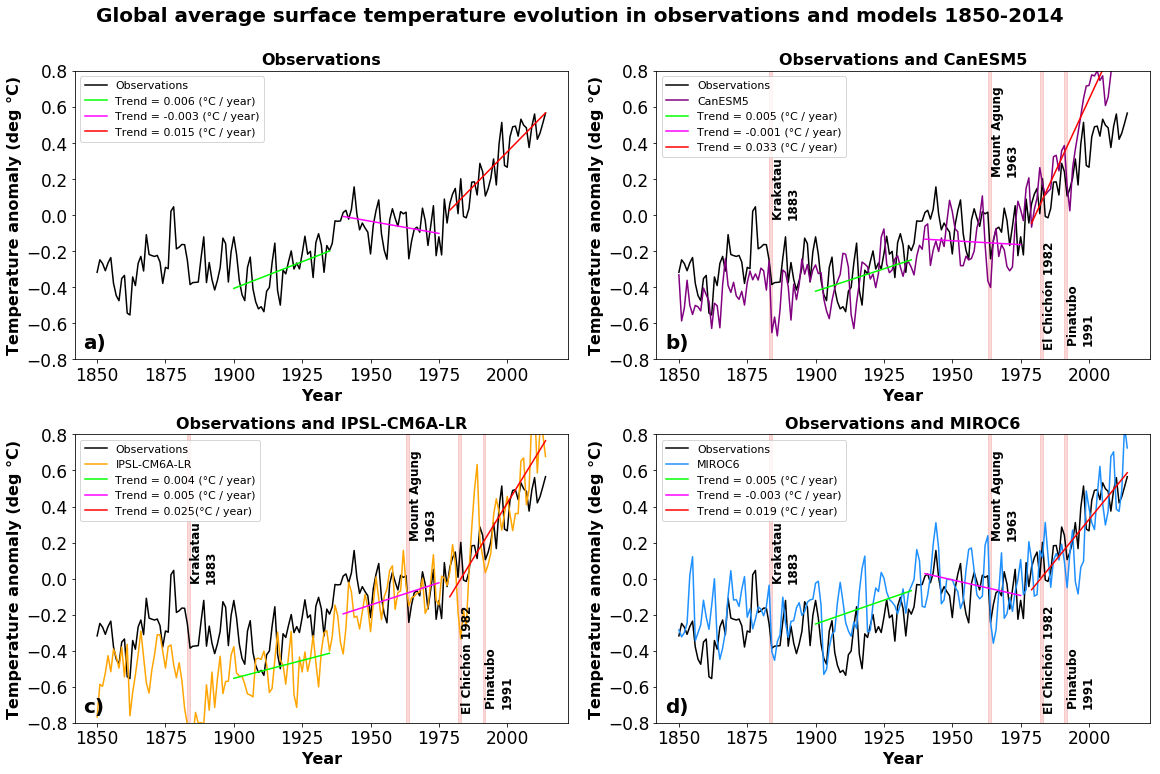

In [17]:
# Time x-axis 
x_time =  _HADCRUT4.to_dataframe()
x_time['year'] = x_time.index.year
x = x_time['year']
# Pick out 4 major volcanic eruptions
Krakatao = x_time['year'][33] 
Krakatao2 = x_time['year'][34]
Mount_Agung = x_time['year'][113] 
Mount_Agung2 = x_time['year'][114]
Pinatubo = x_time['year'][141]
Pinatubo2 = x_time['year'][142]
Elchichon = x_time['year'][132] 
Elchichon2 = x_time['year'][133]   

# Create a subplot 2x2 size and selecting figure size
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize=[16,10],constrained_layout=True)
axs = ax.flatten()


# Plot observations
for i in range(4):
    axs[i].plot(x_time['year'],x_time['temperature_anomaly'], color = 'k', label = 'Observations');
    axs[i].set_ylabel('Temperature anomaly (deg °C)',fontsize = 16,fontweight = 'bold')
    axs[i].set_xlabel('Year',fontsize = 16,fontweight = 'bold')
    axs[i].set_ylim(-0.8,0.8)

# plot trend lines in observations  
axs[0].plot(_line1['year'], _line1['line1'],color = 'lime',label = 'Trend = 0.006 (°C / year)');
axs[0].plot(_line2['year'],_line2['line2'],color = 'magenta',label = 'Trend = -0.003 (°C / year)');
axs[0].plot(_line3['year'],_line3['line3'],color = 'r',label = 'Trend = 0.015 (°C / year)');

axs[0].set_title("Observations",fontweight = 'bold', fontsize = 16)

# Plot marker for volacnic eruptions
for i in range(3):
    axs[i+1].axvspan(Krakatao, Krakatao2, color= 'lightcoral', alpha=0.3)
    axs[i+1].axvspan(Mount_Agung, Mount_Agung2, color='lightcoral', alpha=0.3)
    axs[i+1].axvspan(Pinatubo, Pinatubo2, color='lightcoral', alpha=0.3)
    axs[i+1].axvspan(Elchichon,Elchichon2,color = 'lightcoral', alpha=0.3)
    axs[i+1].text(Krakatao2,0.2,'Krakatau \n1883',rotation = 90,fontsize = 12,fontweight = 'bold')
    axs[i+1].text(Mount_Agung2,0.6,'Mount Agung \n1963',rotation = 90,fontsize = 12,fontweight = 'bold')
    axs[i+1].text(Pinatubo2,-0.5,'Pinatubo \n1991',rotation = 90,fontsize = 12,fontweight = 'bold')
    axs[i+1].text(Elchichon2,-0.2,'El Chichón 1982',rotation = 90,fontsize = 12,fontweight = 'bold')
    

# Plot CanESM5 historical run
axs[1].plot(x_time['year'],anomalies_CanESM5,color = 'purple',label = 'CanESM5');
# Title
axs[1].set_title("Observations and CanESM5",fontweight = 'bold', fontsize = 16)

# Plot IPSL historical run 
axs[2].plot(x_time['year'],anomalies_IPSL['tas'],color = 'orange',label = 'IPSL-CM6A-LR');
# Title 
axs[2].set_title("Observations and IPSL-CM6A-LR",fontweight = 'bold', fontsize = 16)

# Plot MIROC6 historical run 
axs[3].plot(x_time['year'],anomalies_MIROC6,color = 'dodgerblue',label = 'MIROC6');
# Title
axs[3].set_title("Observations and MIROC6",fontweight = 'bold', fontsize = 16)

# plot trend lines in models 
# CanESM5 
axs[1].plot(_line1_model1['year'], _line1_model1['line1_model1'],color = 'lime',label = 'Trend = 0.005 (°C / year)');
axs[1].plot(_line2_model1['year'], _line2_model1['line2_model1'],color = 'magenta',label = 'Trend = -0.001 (°C / year)');
axs[1].plot(_line3_model1['year'], _line3_model1['line3_model1'],color = 'r',label = 'Trend = 0.033 (°C / year)');

# MIROC6
axs[3].plot(_line1_model2['year'], _line1_model2['line1_model2'],color = 'lime',label = 'Trend = 0.005 (°C / year)');
axs[3].plot(_line2_model2['year'], _line2_model2['line2_model2'],color = 'magenta',label = 'Trend = -0.003 (°C / year)');
axs[3].plot(_line3_model2['year'], _line3_model2['line3_model2'],color = 'r',label = 'Trend = 0.019 (°C / year)');

# IPSL
axs[2].plot(_line1_model3['year'], _line1_model3['line1_model3'],color = 'lime',label = 'Trend = 0.004 (°C / year)');
axs[2].plot(_line2_model3['year'], _line2_model3['line2_model3'],color = 'magenta',label = 'Trend = 0.005 (°C / year)');
axs[2].plot(_line3_model3['year'], _line3_model3['line3_model3'],color = 'r',label = 'Trend = 0.025(°C / year)');


# Plot bigger x and y ticks and legend
for i in range(4):
    axs[i].xaxis.set_tick_params(labelsize = 17)
    axs[i].yaxis.set_tick_params(labelsize = 17)
    axs[i].legend(fontsize = 11,loc = 'upper left')

# Numerate the plots
axs[0].text(1845,-0.74,'a)',rotation = 0,fontsize = 20,fontweight = 'bold')
axs[1].text(1845,-0.74,'b)',rotation = 0,fontsize = 20,fontweight = 'bold')
axs[2].text(1845,-0.74,'c)',rotation = 0,fontsize = 20,fontweight = 'bold')
axs[3].text(1845,-0.74,'d)',rotation = 0,fontsize = 20,fontweight = 'bold')


plt.suptitle("Global average surface temperature evolution in observations and models 1850-2014",fontweight = 'bold',size=20, y=1.06); 
#plt.savefig('Global_temp_evolution.pdf')
   

<b> Figure 1: </b> Temperature anomalies from observations 1850-2014 (black curve) and the temperature anomalies from the three models CanESM5 (purple curve), IPSL-CM6A-LR (orange), and MIROC6 (blue curve). All curves are anomalies relative to the 1961-1990 climatology. Linear trend lines from three chosen time periods are plotted on top of the observations in (a), CanESM5 in (b), IPSL-CM6A-LR in (c) and MIROC6 in (d). The green line is 1900-1935, the pink line is 1940-1975 and the red line is 1979-2014. Four major volcanic eruptions are marked in (b),(c) and (d) where the line thickness is one year. 

Figure 1 shows temperature anomalies relative to the 1961-1990 climatology for the observation-dataset HadCRUT4 (the black curves), in which is plotted together with the chosen temperature anomalies from the models CanESM5 (Figure 1(b)), IPSL-CM6A-LR (Figure 1(c)) and MIROC6 (Figure 1(d)).  
    
From both the observations and the models, it is clear that, overall, the global mean surface temperature has increased from 1850-2014. It can be seen from the estimated trends, that the evolution is not even. For the observations in Figure 1 (a), a temperature increase is seen from 1900-1935 (0.006 °C per year) and from 1979-2014 (0.015 °C per year). Clearly, the temperature increase is more rapid the recent years compared to the beginning of the 20th century. A period characterized by cooling can be seen in the middle of the two warming periods, with a linear cooling trend of -0.003 °C per year. The CanESM5 model shows trend values close to the observations for the two first trend periods (green and pink lines). For 1979-2014, the trend value of 0.033 °C per year is approximately the double of the one from the observations.
In the IPSL-CM6A-LR model, a temperature decrease can not be seen between 1940-1975. Instead, a temperature increasing trend of 0.005 °C per year is identified. The trend values in the  MIROC6 model yields approximately the same trend values compared to the observations. The negative trend between 1940-1975 is identic as for the observations, and only minor numbers separate the two other trend periods from the observations.

The fit between the CanESM5 model and the observations (Figure 1 (b)), is best after around 1900, except for a large overestimate after around 1990. The IPSL-CM6A-LR (Figure 1 (c)) underestimates before about 1950. The observation-model curves fit very well between around 1950-1980, followed by some minor mix of underestimating and overestimating. In contrast to IPSL-CM6A-LR, the MIROC6 model (Figure 1 (d)) is dominated by overestimation. The model and the observations fit pretty good after about the 1960s, but a larger dip is present immediately before the year 2000.

Figure 1 (a), (b), and (c) mark four chosen major volcanic eruptions during the time 1850-2014. These include Krakatau (1883), Mount Agung (1963), El Chichon (1982) and Pinatubo (1991). After the Krakatau eruption, a cooling signal of about 0.135°C through the year 1884 is seen in the observations. A more substantial temperature decrease is recognized after the Mount Agung in 1963, where the temperature drop is about -0.227°C, considering the end of 1964. For the El Chichon eruption, a reduction in the temperature is not present before one year after the outbreak. First, the temperature increase from 1982 through 1983 by approximately 0.194° C. Further, from 1984 to 1985, the temperature decrease slightly to about -0.008°C. A cooling period is seen after the Pinatubo eruption in 1991 as well, with a temperature decrease of around 0.094°C from 1991 to 1993. The cooling signals in the CanESM5 model after the explosions (Figure 1 (b)), are larger compared to the observations, except for the Mount Agung in 1963 (about -0.036°C from 1963-1964). The estimated cooling temperatures for the three others are: Krakatau (0.399°C from 1883-1884), El Chichon (-0.152°C from 1982-1983) and Pinatubo (-0.363°C from 1991-1993). From the IPSL-CM6A-LR model (Figure 1(c)), the estimated temperature decrease values following the four eruptions are as follows: Krakatau (0.148°C from 1883-1884), Mount Agung (0.112°C from 1963-1964), El Chichon (0.147°C from 1982-1983) and Pinatubo (0.093°C from 1991-1992). Overall, The MIROC6 model (Figure 1 (d)) displays the highest cooling signals of all the three models for the Krakatau (0.416°C from 1883-1885) and Mount Agung (0.597°C from 1963-1965). El Chichon yields a temperature drop of about 0.038°C from 1982-1983, and the Pinatubo 0.145°C, from 1991 to 1992. Both slightly larger compared with the observations.    

#### 3.1.2 Test of Significance for the trends  

<p style='text-align: justify;'>
 </p>

Table 3 summarizes the temperature trends presented in Figure 1 for the observation dataset HadCRUT4 and the three models CanESM5, MIROC6, and IPSL-CM6A-LR. In addition,  the t-statistics and p-values are shown for each trend periods (Taken from the linear regression summary done by python). 

   
| Data    | 1900-1935 | t | p > abs(t)|                                         
|------|-----|-----|------|
| HadCRUT4|  0.006   | 3.262 |0.003 |
| CanESM5 |   0.005   | 2.848 |0.007 |
| MIROC6  |  0.005   | 2.353|0.025  |
| IPSL-CM6A-LR | 0.004 | 2.274  |0.029 |
     
| Data    | 1940-1975 | t | p > abs(t)|            
|------|-----|-----|------|
| HadCRUT4|  -0.003   |-1.818 |0.078 |
| CanESM5 |   -0.001  | -0.412 |0.683 |
| MIROC6  |  -0.003   |-1.398 |0.171 |
| IPSL-CM6A-LR | 0.005 | 2.854  |0.007 |
    
| Data    | 1979-2014 | t | p > abs(t)|            
|------|-----|-----|------|
| HadCRUT4|   0.015  |11.004  |0.000 |
| CanESM5 |   0.033   | 15.115 |0.000 |
| MIROC6  |  0.019   | 7.269| 0.000|
| IPSL-CM6A-LR | 0.025 | 7.982  |0.000 |

<center>
<b> Table 3: </b> Temperature trends given in °C/year for 1900-1935, 1940-1975 and 1979-2014. Corresponding t-values and p-values are also shown. 

 
<p></p>
    <p></p>   
    
    
From the observations (HadCRUT4), the p-value, for the two sided test yields a p-value smaller than 0.05 for 1900-1935, but this is not true for the case 1940-1975 and 1979-2014. Based on this, we reject the null-hypothesis for the 1900-1935 trend and conclude that this is significant at a 5% significance level. For the CanESM5 trend values, the same conclusions can be made. A small p-value for the 1900-1935 leads to rejecting of the null hypothesis in this case as well. For the MIROC6 model trend output, the p-value is 0.05 for the 1900-1935, 0.342 for 1940-1975, and 0 for 1979-2014. None of these indicate that we can reject the null hypothesis, Therefore not significant at a 5% significance level. For the IPSL-CM6A-LR trends, only the 1940-1975 shows a significant trend with a p-value of 0.01. 

####  3.2 DAMIP forcing experiments 

#### 3.2.1 Anthropogenic Radiative forcing 

Text(0.5,1.06,'Anthropogenic forcing')

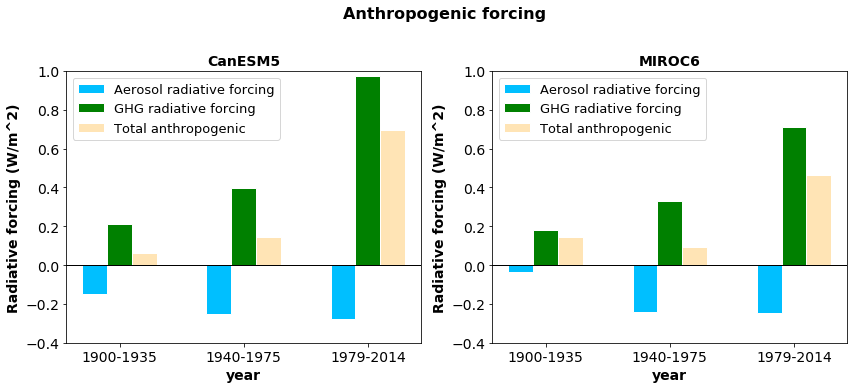

In [18]:
# The bar hights 

# CanESM5

aerf_1900_1935_C,aerf_1940_1975_C,aerf_1979_2014_C,ghgf_1900_1935_C,ghgf_1940_1975_C,ghgf_1979_2014_C = bars(aerf_C,ghgf_C)

# MIROC6
aerf_1900_1935_M,aerf_1940_1975_M,aerf_1979_2014_M,ghgf_1900_1935_M,ghgf_1940_1975_M,ghgf_1979_2014_M = bars(aerf_M,ghgf_M)

barWidth = 0.20

fig = plt.subplots(2,figsize=(14, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122,sharex = ax1)

# set height of bar
bars1 = [aerf_1900_1935_C,aerf_1940_1975_C,aerf_1979_2014_C]
bars2 = [ghgf_1900_1935_C,ghgf_1940_1975_C,ghgf_1979_2014_C]
bars3 = [aerf_1900_1935_C + ghgf_1900_1935_C,aerf_1940_1975_C +ghgf_1940_1975_C,aerf_1979_2014_C+ghgf_1979_2014_C]
# Set position of bar on x axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.xticks([r + barWidth for r in range(len(bars1))],['1900-1935','1940-1975','1979-2014'])

# Make the plot
ax1.bar(r1, bars1, color='deepskyblue', width=barWidth, edgecolor='white', label='Aerosol radiative forcing')
ax1.bar(r2, bars2, color='green', width = barWidth, edgecolor='white', label='GHG radiative forcing')
ax1.bar(r3, bars3, color =  'moccasin' , width = barWidth,edgecolor='white', label='Total anthropogenic')
# Add xticks on the middle of the group bars


# Create legend & Show graphic
ax1.legend(fontsize = 13,loc = 'upper left')
ax1.axhline(y = 0.0,color = 'k',linewidth = 1)
ax1.set_xlabel('year', fontweight='bold',fontsize = 14)
ax1.set_ylabel('Radiative forcing (W/m^2)',fontweight = 'bold',fontsize = 14)
ax1.set_ylim(-0.4,1)
ax1.set_title('CanESM5',fontweight = 'bold',fontsize = 14)

ax2.xaxis.set_tick_params(labelsize = 14)
ax1.xaxis.set_tick_params(labelsize = 14)
ax2.yaxis.set_tick_params(labelsize = 14)
ax1.yaxis.set_tick_params(labelsize = 14)

bars1_M = [aerf_1900_1935_M,aerf_1940_1975_M,aerf_1979_2014_M]
bars2_M = [ghgf_1900_1935_M,ghgf_1940_1975_M,ghgf_1979_2014_M]
bars3_M = [aerf_1900_1935_M + ghgf_1900_1935_M,aerf_1940_1975_M +ghgf_1940_1975_M,aerf_1979_2014_M+ghgf_1979_2014_M]

ax2.bar(r1, bars1_M, color='deepskyblue', width=barWidth, edgecolor='white', label='Aerosol radiative forcing')
ax2.bar(r2, bars2_M, color='green', width = barWidth, edgecolor='white', label='GHG radiative forcing')
ax2.bar(r3, bars3_M, color = 'moccasin', width = barWidth,edgecolor='white', label='Total anthropogenic')

ax2.legend(fontsize = 13,loc = 'upper left')
ax2.axhline(y = 0.0,color = 'k',linewidth = 1)
ax2.set_xlabel('year', fontweight='bold',fontsize = 14)
ax2.set_ylabel('Radiative forcing (W/m^2)',fontweight = 'bold',fontsize = 14)
ax2.set_ylim(-0.4,1)
ax2.set_title('MIROC6',fontweight = 'bold',fontsize = 14);

plt.suptitle('Anthropogenic forcing',fontweight = 'bold',size=16, y=1.06)
#plt.savefig('RF.pdf')

<b> Figure 2: </b> RF as change in net radiation at TOA grouped into average values for same years as the trends in Section 3.1.2 with CanESM (left) and MIROC6 (right). Blue bars represent RF with only anthropogenic aerosols contributing to the forcing, green bars are WMGHG's only and the beige bars are the aerosol bars added to the WMGHG's to obtain the toal anthropogenic forcing. RF is calculated by substracting piControl for total radiation from total radiation from hist-aer and hist-GHG at TOA.

Averages of RF for the same time periods as the linear trends for Aerosol only perturbation and WMGHG's only are displayed in Figure 2 above. The radiative forcing from the anthropogenic greenhouse gases increases over the time periods in both models, but the MIROC6 shows smaller GHG forcings compared to CanESM5. In both models, the aerosol only experiment produces negative forcing in all time periods with almost the same values for 1940-1975 and 1979-2014. The total anthropogenic forcing from the two agents produces positive forcings for all time periods in both models with smaller values for MIROC6 compared to CanESM5.

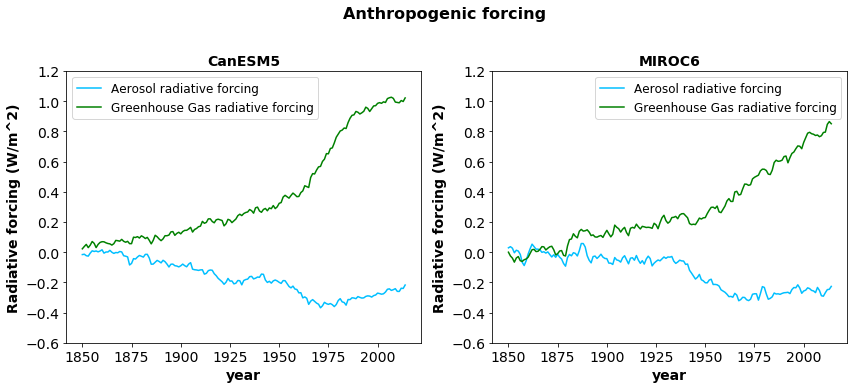

In [19]:
# x axis 
x_time =  _HADCRUT4.to_dataframe()
x_time['year'] = x_time.index.year
x = x_time['year']

fig = plt.subplots(2,figsize=(14, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122,sharex = ax1)

_aerf_C = aerf_C.rolling({'time':30},center=True,min_periods=1)
_ghgf_C = ghgf_C.rolling({'time':30},center=True,min_periods=1)
_aerf_M = aerf_M.rolling({'time':30},center=True,min_periods=1)
_ghgf_M = ghgf_M.rolling({'time':30},center=True,min_periods=1)

ax1.plot(x,_aerf_C.mean(), label = 'Aerosol radiative forcing', color = 'deepskyblue');
ax1.plot(x,_ghgf_C.mean(), label = 'Greenhouse Gas radiative forcing',color = 'green')
ax2.plot(x,_aerf_M.mean(), label = 'Aerosol radiative forcing',color = 'deepskyblue')
ax2.plot(x,_ghgf_M.mean(), label = 'Greenhouse Gas radiative forcing',color = 'green')

ax1.set_ylim(-0.6,1.2)
ax2.set_ylim(-0.6,1.2)
ax1.set_title('CanESM5',fontsize = 14,fontweight = 'bold')
ax2.set_title('MIROC6',fontsize = 14,fontweight = 'bold')

ax1.xaxis.set_tick_params(labelsize = 14)
ax2.xaxis.set_tick_params(labelsize = 14)
ax1.yaxis.set_tick_params(labelsize = 14)
ax2.yaxis.set_tick_params(labelsize = 14)

ax1.set_xlabel('year', fontweight='bold',fontsize = 14)
ax2.set_xlabel('year', fontweight='bold',fontsize = 14)
ax1.set_ylabel('Radiative forcing (W/m^2)',fontsize = 14, fontweight='bold')
ax2.set_ylabel('Radiative forcing (W/m^2)', fontsize = 14, fontweight = 'bold')

ax1.legend(fontsize = 12);
ax2.legend(fontsize = 12);

plt.suptitle('Anthropogenic forcing',fontweight = 'bold',size=16, y=1.06);
#plt.savefig('RF_evolution.pdf')


<b> Figure 3: </b> Time series 1850 to 2014 of RF as change in net radiation at TOA from antropogenic aerosols only (blue curve) and WMGHGs (green curve) plotted as a running mean of 10 years. CanESM5 is given on left hand side and MIROC6 on the right hand side.  

Figure 3 shows the time evolution of the resulting RF from 1850-2014 for CanESM5 and MIROC6. RF becomes more positive with increased concentrations of greenhouse gases and there is a distinct jump in RF after 1950 in CANESM5 compared to MIROC6, where the increase looks more even over the time domain. In general, the aerosol forcing only perturbation yields a increase in more negative RF in both models. In CanESM5, a sligtly less negative forcing is evident during about 1925 to 1950, before getting more negative for some years before rising slowly again against less negative values. In MIROC6, a noticable increase in negative forcing occurs from around 1925 before it stabilizes/getting less negative more after 1960. 

| Model   | 1910 | 1960 | 2010|
|---------|-----------|-----------|-----------|
| CanESM5 (aerosol only)|  -0.12 W/m^2 | -0.27 W/m^2     | -0-26 W/m^2   |  
| MIROC6 (aerosol only)| -0.05  W/m^2   | -0.27 W/m^2    | -0.29 W/m^2   | 
| CanESM5 (WMGHGs only)|0.17 W/m^2|0.40 W/m^2|0.99 W/m^2|
| MIROC6 (WMGHGs only) |0.13 W/m^2|0.31 W/m^2|0.79 W/m^2|




#### 3.2.2 Temperature response 

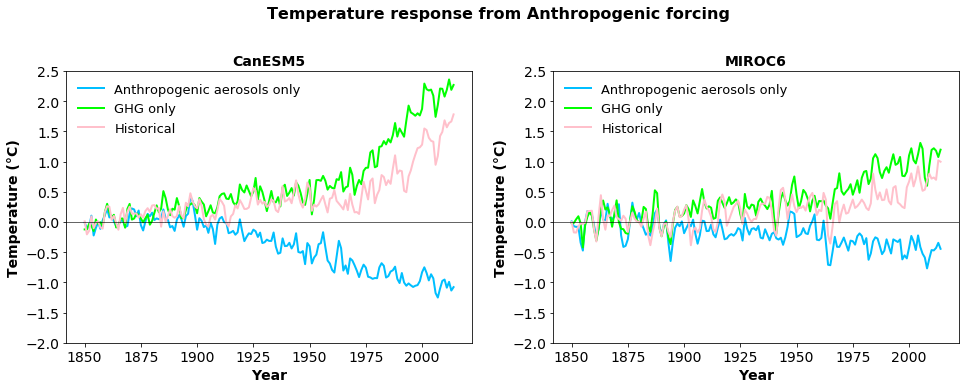

In [20]:
# x axis 
x_time =  _HADCRUT4.to_dataframe()
x_time['year'] = x_time.index.year
x = x_time['year']

# Make subplot 
fig = plt.subplots(2,figsize=(16, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(x,tas_aer_change['tas'][:,False].values, color='deepskyblue', lw=2,label = 'Anthropogenic aerosols only')
ax1.plot(x,tas_ghg_change['tas'][:,False].values,color = 'lime',lw =2, label =  'GHG only')
ax1.plot(x,tas_hist_change['tas'][:,False].values,lw = 2,color = 'pink',label = 'Historical')

ax2.plot(x,tas_aer_change_M['tas'][:,False].values, color='deepskyblue', lw=2,label = 'Anthropogenic aerosols only')
ax2.plot(x,tas_ghg_change_M['tas'][:,False].values,color = 'lime',lw =2, label =  'GHG only')
ax2.plot(x,tas_hist_change_M['tas'][:,False].values,lw = 2,color = 'pink',label = 'Historical')

# Specify y-lim axis
ax1.set_ylim(-2,2.5)
ax2.set_ylim(-2,2.5)

ax1.set_xlabel('Year',fontsize = 14,fontweight = 'bold')
ax2.set_xlabel('Year',fontsize = 14,fontweight = 'bold')
ax1.set_ylabel('Temperature (°C)',fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('Temperature (°C)',fontsize = 14,fontweight = 'bold')

ax1.xaxis.set_tick_params(labelsize = 14)
ax2.xaxis.set_tick_params(labelsize = 14)
ax1.yaxis.set_tick_params(labelsize = 14)
ax2.yaxis.set_tick_params(labelsize = 14)

ax1.axhline(y = 0.0,color = 'k',linewidth = 0.6)
ax2.axhline(y = 0.0,color = 'k',linewidth = 0.6)
ax1.set_title('CanESM5',fontsize = 14,fontweight = 'bold')
ax2.set_title('MIROC6',fontsize = 14,fontweight = 'bold')
ax1.legend(frameon=False,fontsize = 13,loc = 'upper left');
ax2.legend(frameon=False,fontsize = 13,loc = 'upper left');

plt.suptitle('Temperature response from Anthropogenic forcing',fontweight = 'bold',size=16, y=1.06);
#plt.savefig('tas_responses.pdf')

<b> Figure 4: </b> Time series 1850 to 2014 of global eman temperature response in degrees celcius for Aerosol only, WMGHGs only and the historical which contains all the forcings (natural as well) for CanESM5 (left) and MIROC6 (right). 

The global mean temperature response due to aerosols, WMGHGs, and with all forcings (historical) are presented in Figure 4. Both CanESM5 and MIROC6 show that the global mean temperature is increasing regarding to pre-industrial levels as WMGHGs is the only agent of forcing. For the anthropogenic aerosol only forcing, the global temperature decreases. The temperature increase and decrease response are larger in the CanESM5 model compared to the MIROC6. CanESM5 shows a diverging among the two graphs already after 1900, while the diverging is not recognized before around 1960 and outward in MIROC6. The historical temperature graph is taking a path which lay closest to the WMGHGs in both models.  </p>

Table 4 below shows the temperature trend for 1940-1975 for the only aerosol agent (hist-aer), only GHG-agent (hist-GHG) and the total temperature change due to anthropogenic forcing over the period. The estimated values show that CanESM5 gives an overall temperature change of -0.10 °C and MIROC6 some smaller value of -0.04. </p>


| Model  |  hist-aer| hist-ghg | Total ΔT|
|---------|-----------|-----------|-----------|
| CanESM5 |  -0.001    | 0.090    | -0.100  | 
| MIROC6  |   -0.090  |  0.080 |    -0.040 |

<b> Table 4:</b> 
<font size = '2;' > Trends for 1940-1975 given in °C per decade in the hist-aer and hist-ghg column. Total ΔT shows the temperature change over the period. 

## 3. Discussion 

The cooling signal in global mean surface temperature between 1940 and 1975 corresponds approximately to a total decrease of -0.1 °C over the period based on the linear trend estimate from the observations. This decrease is not large, but stands out from the two other warming periods 1900-1935, and 1979-2014. It's essential to have in mind, the uncertainties connected to the observed estimated global temperatures. There exists huge lack of data grid points all over the globe, especially before prior to 1900. Even though the choice of reference period 1961-1990 in HadCRUT4 contains a high amount of data, nevertheless, the whole Earth is not covered (Ed and Sutton,2016). This might introduce some difficulties when compared with the historical model simulations. It is not only within the observations there are uncertainties, the climate models also bring associated uncertainties. These include, for instance, differences in how the runs in the simulations are done. Some processes in the Earth climate system is happening on such a small scale, which then must parametrizes to be resolved by the model. The method in how this achieves often varies among the models. Another example of uncertainties is how the different calculations and estimates are performed in the programming process, for instance in how the weighted average is taken and so on. The latter is also true for the observations.  

After about 1900, the results from Figure 1, do not show considerably large divergent behavior across the models and observations. The model IPSL-CM6A-LR is the only model out of the three considered in which is not reproducing the period of decreasing global mean temperatures. Most likely, we would expect to see a cooling in the global mean temperature for some short time period after a large volcanic eruption. For the four major volcanic eruptions picked here, a cooling signal can be seen in the observations, and most of them are also shown in the models. The Mount Agung eruption in 1963 happened after the trend in which global mean temperatures were already decreasing. The slightly cooling observed between 1940 and 1975 could might be explained by anthropogenic aerosol injections. The next paragraph discusses the estimated RF on the top of the models from anthropogenic aerosols and WMGHGs and linking this to the temperature responses. 
    
The estimated trends for observations found in Table 3 provides a total temperature increase of 0.21 °C over 1900-1935 and 0.54 °C over 1979-2014. It's evident that the largest temperature increase has occurred over the last decades. This is also reflected in the bar plots of Figure 2, where we can clearly see that anthropogenic greenhouse gases dominating the 1979-2014 RF in both CanESM5 and MIROC6. Anthropogenic aerosols look to yield more or less same RF for 1979-2014 compared to 1940-1975, indicating that greenhouse gas forcing is the one that is getting more and more import with time. When looking at the forcing over the whole time period instead (Figure 3), the aerosol forcing and greenhouse gas forcing are spreading apart at an earlier time in CanESM5 (around after 1900) than in MIROC6 (about after 1925), but there is a signal of slightly decreasing of the negative aerosol forcing after the peak around 1960 in both models. From the temperature response (Figure 4), we can see that the temperature decreases after around 1900 in CanESM5 in which coincides with the radiative forcing aerosol only (Figure 3). MIROC6, on the other hand, does not yield a clear signal of a linear temperature decrease, but the temperature is slightly lower after 1960 and outwards. Overall, the MIROC6 showed lower magnitudes of the RF (Figure 2/Figure3) compared to CanESM5, which might could explain the small temperature responses observed in Figure 4. Focusing only on the observed cooling period and then considering the temperature trends estimated for the components hist-aer and hist-GHG, a total temperature decrease of -0.1 °C is estimated from CanESM5 and -0.04 °C in MIROC6 from anthropogenic forcing only. The cooling of -0.1 °C is similar to the value from the observed changes, while MIROC6 underestimates this slightly. As already discussed, the reason why MIROC6 shows a smaller temperature response value than CanESM5 could be explained by the corresponding lower RF (Figure 2). 

In general, understanding interactions between aerosol forcing evolution and temperature evolution is not the easiest. Aerosols are complex, in which they could have both, directly and indirectly, effects in the Earth system. For instance, cloud-aerosol interactions are denoted as "rapid adjustment". These adjustments act over a quite short time period compared to the global temperature changes, which is slower in its responses. RF is not considered as a correct indicator of temperature responses due to aerosol forcing since those rapid adjustments can enhance/reduce flux perturbations in which might lead to differences in the long term changes in climate (IPCC,2013). From the time evolution graph of RF (Figure 3), we can see that a value for the aerosol RF in i.e., 2010 is around -0.3 W/m^2, this is much smaller than the ERF for 2010 mentioned in Section 1, namely -0.9 W/m^2. Since ERF includes rapid adjustments, this is probably a better definition to use when discussing aerosol trends and temperature trends.

## 4. Conclusions and outlook

In this report, the anthropogenic forcing history 1850-2014 has been presented with relation to temperature changes over the history. The historical simulations from the models CanESM5, MIROC6, and IPSL-CM6A-LR contained in CMIP6 are compared to the observations. To be able to compare across them, the model temperature needed to be converted into anomalies since we only had observations in anomalies. The comparison result showed that IPSL-CM6A-LR did not capture the negative trend that was shown in the observations. MIROC6 was closest in reproducing the negative linear trend by only -0.005 °C apart. The radiative forcing of aerosol-only and WMGHGs-only was discussed between CanESM5 and MIROC6. Overall,MIROC6 showed lower radiative forcing than CanESM5 with smaller temperature responses as well. When studying the temperature trends in aerosol-only and WMGHGs-only, the total temperature increase from total anthropogenic (aerosol-only temperature total decrease + WMGHGs-only temperature total increase) forcings produces a value of -0.1 °C with CanESM5. This value is the same as from the observations. MIROC6 produces a slightly less value of -0.04 °C. With a lower RF in MIROC6 compared to CanESM5 this could might be the cause why MIROC6 is presenting lower temperature responses than CanESM5.

The distinct temperature decrease due to aerosol-only forcing is evident in the CanESM5 model, but is not decreasing as much in MIROC6, which we stated could be due to the less radiative forcing. The estimated trend for the total anthropogenic forcing showed the same value as for the observations in the cooling period, which might indicate that there is some link between the temperature responses in CanESM5 and the anthropogenic radiative forcing in the same period.

It is hard to draw some conclusions from this study. Especially, there is high uncertainty in the observation dataset connected to inadequate data coverage over many years. To better compare the models with the observations, data from where we don't have observations could be removed in the models as well to give more accurate results. In addition, uncertainties associated with the climate models are also an important factor to bear in mind. 

##  5. References 

Ramanathan, V. C. P. J., et al. "Aerosols, climate, and the hydrological cycle." science 294.5549 (2001): 2119-2124.

Myhre, G., D. Shindell, F.-M. Bréon, W. Collins, J. Fuglestvedt, J. Huang, D. Koch, J.-F. Lamarque, D. Lee, B. Mendoza, T. Nakajima, A. Robock, G. Stephens, T. Takemura and H. Zhang, 2013: Anthropogenic and Natural Radiative Forc- ing. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung, A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA.

IPCC, 2013: Annex II: Climate System Scenario Tables [Prather, M., G. Flato, P. Friedlingstein, C. Jones, J.-F. Lamarque, H. Liao and P. Rasch (eds.)]. In: Climate Change 2013: The Physical Science Basis. Contribution of Working Group I to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Stocker, T.F., D. Qin, G.-K. Plattner, M. Tignor, S.K. Allen, J. Boschung, A. Nauels, Y. Xia, V. Bex and P.M. Midgley (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA.

Climatic Research Unit, University of East Anglia, Janurary 2016, <i>Temperature</i> ,viewed 11 Nov 2019, https://crudata.uea.ac.uk/cru/data/temperature/ 

Gillett, N. P., Shiogama, H., & Funke, B. (2016). The Detection and Attribution Model Intercomparison Project (DAMIP v1. 0) contribution to. Geoscientific Model Development, 9 (10).

Hawkins, Ed, and Rowan Sutton. "Connecting climate model projections of global temperature change with the real world." Bulletin of the American Meteorological Society 97.6 (2016): 963-980.

Swart, N. C., Cole, J. N., Kharin, V. V., Lazare, M., Scinocca, J. F., Gillett, N. P., ... & Jiao, Y. (2019). The Canadian Earth System Model version 5 (CanESM5. 0.3). Geoscientific Model Development, 12(11), 4823-4873.

Tatebe, H., Ogura, T., Nitta, T., Komuro, Y., Ogochi, K., Takemura, T., ... & Chikira, M. (2019). Description and basic evaluation of simulated mean state, internal variability, and climate sensitivity in MIROC6. Geoscientific Model Development, 12(7), 2727-2765.

## Acknowledgements 

I would like to thank my group supervisors Michael and Diego for help during the course and after as well. I will also like to thank my fellow students for good encouragement and postive minds. The study was performed using Jupyter Lab with the language Python. 